# Capstone Project - Credit Card Fraud Detection

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

# Business Problem Overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.



## Data Overview

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data = '/content/drive/My Drive/Colab Notebooks/Capstone/creditcard.csv'
## reading Demographic data file
data = pd.read_csv("creditcard.csv")
data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [3]:
#creditcard_df overview
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [4]:
# lets check the shape of the data set
data.shape

(284807, 31)

In [35]:
#Checking Null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [36]:
## checking duplicate data and removing the duplicates
data.duplicated(subset=None, keep='first').count()

284807

In [37]:
## checking number of unique entries across each variable
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [38]:
## describing demographic data
data.describe(percentiles=[0.10,.25,.5,.75,.90,.95])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,...,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,...,3.761555e-01,9.148826e-01,3.392860e-01,7.054036e-01,6.009027e-01,6.889469e-01,2.653679e-01,1.799362e-01,203.000000,0.000000
95%,164143.400000,2.081223e+00,1.808585e+00,2.062635e+00,2.566501e+00,2.098960e+00,3.160382e+00,1.407632e+00,1.049984e+00,1.780783e+00,...,5.378677e-01,1.128987e+00,4.880160e-01,8.663576e-01,7.606986e-01,9.209154e-01,3.877462e-01,2.560897e-01,365.000000,0.000000


### Exploratory Data Analysis

In [39]:
import pandas_profiling as pf
pf.ProfileReport(data)

Number of variables,31
Number of observations,284807
Total Missing (%),0.0%
Total size in memory,67.4 MiB
Average record size in memory,248.0 B
Numeric,30
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

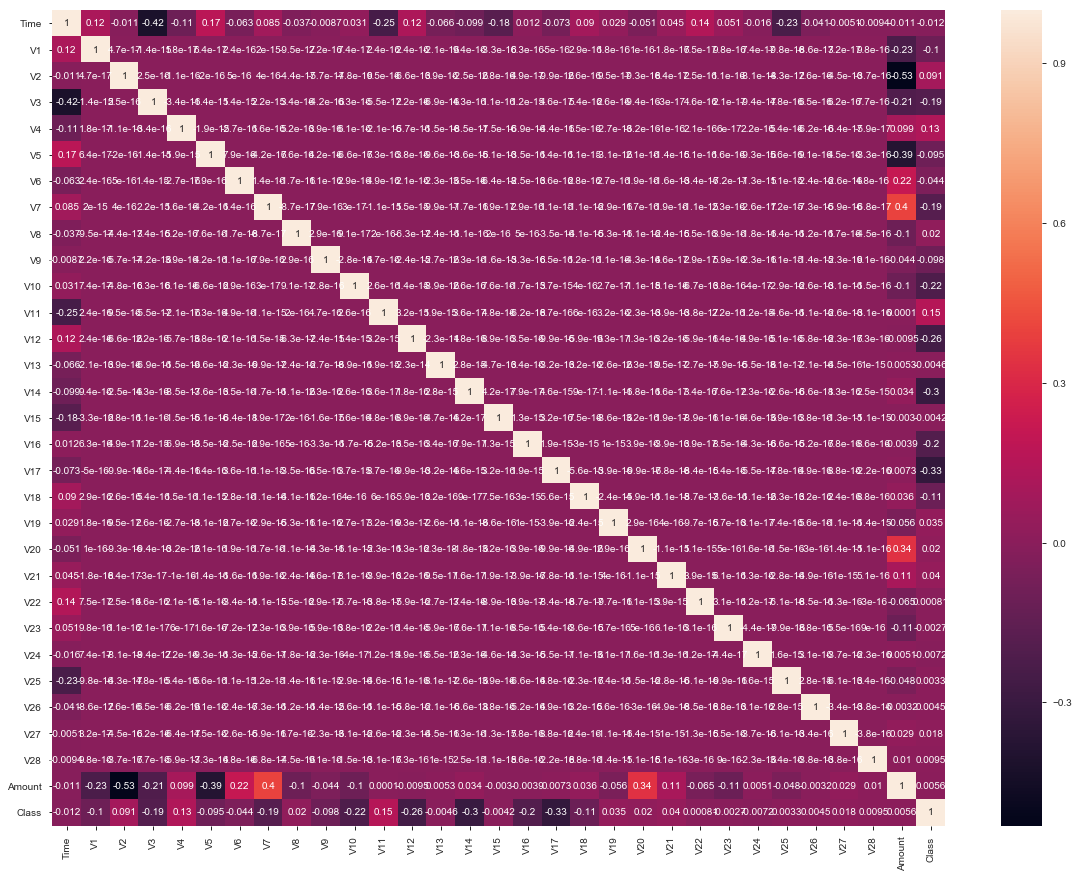

In [41]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

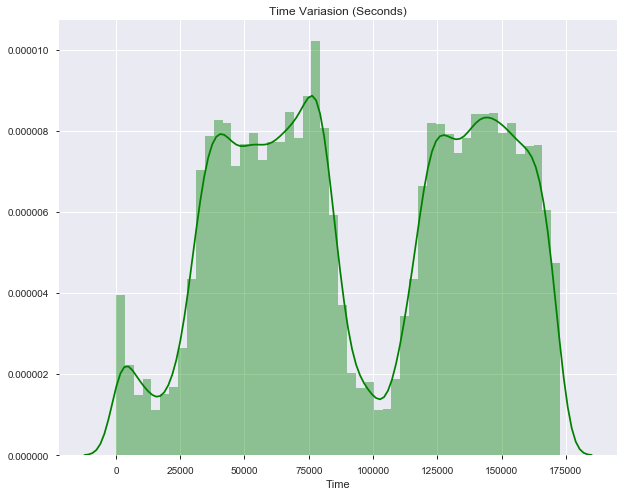

In [42]:
#plot the distribution plot of time 

plt.figure(figsize=(10,8), )
plt.title('Time Variasion (Seconds)')

sns.distplot(data['Time'],color='green')

In [43]:
# lets create a copy of the demographic dataset to perform EDA
data1 = pd.DataFrame(data).copy()

0.1727485630620034


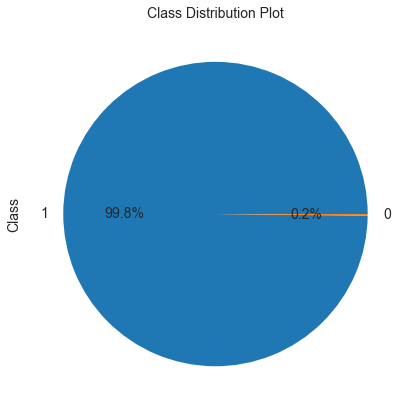

In [44]:
#Tag Churners and Remove Attributes of The Churn Phase
# Checking the churn distribution
axis = (data1['Class'].value_counts()*100.0 /len(data1)).plot.pie(autopct='%.1f%%', labels = ['1', '0'],figsize =(7,7), fontsize = 14 )
axis.set_ylabel('Class',fontsize = 14)
axis.set_title('Class Distribution Plot', fontsize = 14)

#Checking the class Rate
check = (sum(data1['Class'])/len(data1['Class'].index))*100
print(check)

From this dataset we derive there are only 492 fraudulent transactions.

That’s only 0.173% data is frund of all of the transactions in this dataset

### Splitting the data into train & test data

In [45]:
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
# Putting feature variable to X
X = data1.drop(['Class'],axis=1)
# Putting response variable to y
y = data1['Class']
# Please note, we do not need data scaling here as the data is already scaled
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
# lets save all the variable except the target variable
data3 = data1.drop(['Class'],1).columns

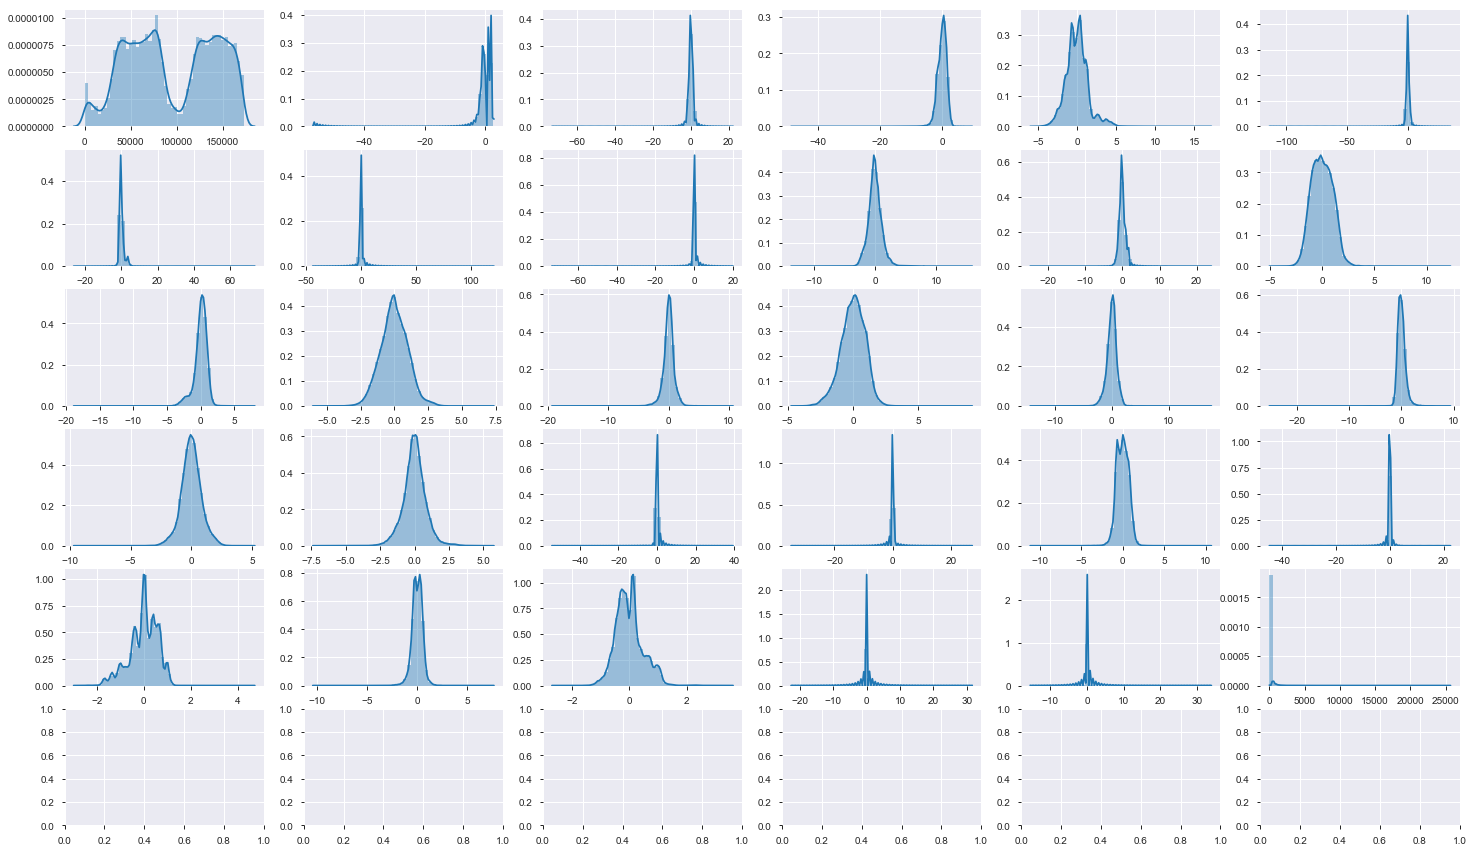

In [47]:
# Ploting the histogram variables from the credit dataset to cross check the skewness
fig, axes = plt.subplots(nrows=6, ncols=6,figsize=(25,15))

for i, column in enumerate(X.columns):
    sns.distplot(X[column],ax=axes[i//6,i%6])

In [48]:
# Checking th train data set
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,10529.0,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,...,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,0.26
190214,128741.0,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,...,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,1.29
130590,79387.0,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,...,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,71.99
247916,153735.0,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,...,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,0.89
55518,46986.0,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,...,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,5.99


In [49]:
# Checking th test data set
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27


In [50]:
print("Before OverSampling, counts of label '1' in Train Data Set: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0' in Train Data Set: {} \n".format(sum(y_train==0)))

print("Before OverSampling, counts of label '1' in Test Data Set: {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0' in Test Data Set: {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1' in Train Data Set: 350
Before OverSampling, counts of label '0' in Train Data Set: 199014 

Before OverSampling, counts of label '1' in Test Data Set: 142
Before OverSampling, counts of label '0' in Test Data Set: 85301 



## Model development with imbalance dataset

### Logistic Regression with RFE

In [51]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score


In [52]:
# Default logistic regression model
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.80
Date:                Mon, 06 Apr 2020   Deviance:                       1451.6
Time:                        20:02:24   Pearson chi2:                 5.75e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2473      0.295    -27.946      0.000      -8.826      -7.669
Time       -6.096e-06   2.77e-06     -2.204      0.027   -1.15e-05   -6.76e-07
V1             0.2048      0.053      3.834      0.000       0.100       0.309
V2            -0.0747      0.067     -1.115      0.265      -0.206       0.057
V3            -0.0662      0.065     -1.014      0.311      -0.194       0.062
V4             0.6854      0.083      8.263      0.000       0.523       0.848
V5             0.0972      0.079      1.237      0.216      -0.057       0.251
V6            -0.1082      0.090     -1.201      0.230      -0.285       0.068
V7            -0.0986      0.082     -1.208      0.227      -0.259       0.061
V8            -0.2002      0.040     -4.957      0.000      -0.279      -0.121
V9            -0.4619      0.127     -3.638      0.000      -0.711      -0.213
V10           -0.8623      0.114     -7.551      0.000      -1.086      -0.638
V11           -0.1698      0.100     -1.689      0.091      -0.367       0.027
V12            0.0211      0.103      0.204      0.838      -0.181       0.223
V13           -0.3442      0.102     -3.385      0.001      -0.543      -0.145
V14           -0.6182      0.076     -8.103      0.000      -0.768      -0.469
V15           -0.2032      0.108     -1.890      0.059      -0.414       0.007
V16           -0.1570      0.139     -1.130      0.258      -0.429       0.115
V17           -0.1223      0.085     -1.447      0.148      -0.288       0.043
V18            0.0533      0.150      0.355      0.722      -0.241       0.347
V19            0.1266      0.118      1.076      0.282      -0.104       0.357
V20           -0.5751      0.108     -5.316      0.000      -0.787      -0.363
V21            0.3820      0.075      5.118      0.000       0.236       0.528
V22            0.5303      0.160      3.308      0.001       0.216       0.845
V23           -0.0574      0.072     -0.798      0.425      -0.198       0.084
V24            0.0919      0.182      0.506      0.613      -0.264       0.448
V25           -0.1094      0.166     -0.661      0.509      -0.434       0.215
V26           -0.0112      0.231     -0.049      0.961      -0.463       0.441
V27           -0.8578      0.167     -5.145      0.000      -1.185      -0.531
V28           -0.3664      0.116     -3.158      0.002      -0.594      -0.139
Amount         0.0009      0.000      1.960      0.050    1.04e-07       0.002
==============================================================================
"""

p-value of the feauture *V26* is high, lets drop it and re create the model

In [53]:
df_col = data3.drop('V26', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199334
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.80
Date:                Mon, 06 Apr 2020   Deviance:                       1451.6
Time:                        20:02:45   Pearson chi2:                 5.72e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2465      0.295    -27.982      0.000      -8.824      -7.669
Time       -6.104e-06   2.76e-06     -2.211      0.027   -1.15e-05   -6.94e-07
V1             0.2045      0.053      3.855      0.000       0.101       0.308
V2            -0.0742      0.066     -1.120      0.263      -0.204       0.056
V3            -0.0663      0.065     -1.016      0.309      -0.194       0.062
V4             0.6857      0.083      8.286      0.000       0.524       0.848
V5             0.0976      0.078      1.244      0.214      -0.056       0.251
V6            -0.1086      0.090     -1.211      0.226      -0.284       0.067
V7            -0.0980      0.080     -1.217      0.224      -0.256       0.060
V8            -0.2003      0.040     -4.964      0.000      -0.279      -0.121
V9            -0.4606      0.124     -3.709      0.000      -0.704      -0.217
V10           -0.8627      0.114     -7.567      0.000      -1.086      -0.639
V11           -0.1696      0.100     -1.689      0.091      -0.366       0.027
V12            0.0221      0.101      0.218      0.828      -0.177       0.221
V13           -0.3443      0.102     -3.389      0.001      -0.544      -0.145
V14           -0.6179      0.076     -8.123      0.000      -0.767      -0.469
V15           -0.2029      0.107     -1.891      0.059      -0.413       0.007
V16           -0.1576      0.138     -1.139      0.255      -0.429       0.114
V17           -0.1231      0.083     -1.484      0.138      -0.286       0.039
V18            0.0540      0.149      0.362      0.717      -0.238       0.347
V19            0.1256      0.116      1.084      0.278      -0.102       0.353
V20           -0.5746      0.108     -5.330      0.000      -0.786      -0.363
V21            0.3817      0.074      5.125      0.000       0.236       0.528
V22            0.5297      0.160      3.313      0.001       0.216       0.843
V23           -0.0575      0.072     -0.799      0.424      -0.198       0.084
V24            0.0917      0.182      0.505      0.614      -0.264       0.447
V25           -0.1105      0.164     -0.673      0.501      -0.432       0.211
V27           -0.8579      0.167     -5.143      0.000      -1.185      -0.531
V28           -0.3662      0.116     -3.157      0.002      -0.594      -0.139
Amount         0.0009      0.000      1.960      0.050    8.53e-08       0.002
==============================================================================
"""

p-value of the feauture *V12* is high, lets drop it and re create the model

In [54]:
df_col = df_col.drop('V12', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199335
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.82
Date:                Mon, 06 Apr 2020   Deviance:                       1451.6
Time:                        20:02:55   Pearson chi2:                 6.02e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2438      0.294    -28.047      0.000      -8.820      -7.668
Time       -6.014e-06   2.73e-06     -2.205      0.027   -1.14e-05   -6.69e-07
V1             0.2034      0.053      3.857      0.000       0.100       0.307
V2            -0.0774      0.064     -1.209      0.227      -0.203       0.048
V3            -0.0643      0.064     -0.998      0.318      -0.190       0.062
V4             0.6796      0.077      8.831      0.000       0.529       0.830
V5             0.0935      0.076      1.233      0.218      -0.055       0.242
V6            -0.1081      0.090     -1.208      0.227      -0.284       0.067
V7            -0.1001      0.080     -1.258      0.208      -0.256       0.056
V8            -0.2007      0.040     -4.974      0.000      -0.280      -0.122
V9            -0.4624      0.123     -3.763      0.000      -0.703      -0.222
V10           -0.8558      0.109     -7.843      0.000      -1.070      -0.642
V11           -0.1689      0.100     -1.685      0.092      -0.365       0.028
V13           -0.3407      0.100     -3.410      0.001      -0.536      -0.145
V14           -0.6140      0.074     -8.347      0.000      -0.758      -0.470
V15           -0.2050      0.107     -1.919      0.055      -0.414       0.004
V16           -0.1538      0.136     -1.128      0.259      -0.421       0.113
V17           -0.1157      0.075     -1.533      0.125      -0.264       0.032
V18            0.0514      0.148      0.348      0.728      -0.238       0.341
V19            0.1252      0.116      1.084      0.278      -0.101       0.352
V20           -0.5711      0.107     -5.353      0.000      -0.780      -0.362
V21            0.3805      0.074      5.127      0.000       0.235       0.526
V22            0.5292      0.160      3.316      0.001       0.216       0.842
V23           -0.0586      0.072     -0.817      0.414      -0.199       0.082
V24            0.0922      0.181      0.508      0.612      -0.263       0.448
V25           -0.1067      0.163     -0.653      0.514      -0.427       0.214
V27           -0.8530      0.166     -5.140      0.000      -1.178      -0.528
V28           -0.3652      0.116     -3.138      0.002      -0.593      -0.137
Amount         0.0009      0.000      1.954      0.051   -2.67e-06       0.002
==============================================================================
"""

p-value of the feauture *V18* is high, lets drop it and re create the model

In [55]:
df_col = df_col.drop('V18', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199336
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.88
Date:                Mon, 06 Apr 2020   Deviance:                       1451.8
Time:                        20:03:44   Pearson chi2:                 6.05e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2556      0.293    -28.215      0.000      -8.829      -7.682
Time        -5.91e-06   2.71e-06     -2.178      0.029   -1.12e-05   -5.91e-07
V1             0.2037      0.053      3.858      0.000       0.100       0.307
V2            -0.0742      0.064     -1.162      0.245      -0.199       0.051
V3            -0.0636      0.065     -0.985      0.325      -0.190       0.063
V4             0.6811      0.077      8.848      0.000       0.530       0.832
V5             0.0976      0.075      1.294      0.196      -0.050       0.245
V6            -0.1098      0.090     -1.226      0.220      -0.285       0.066
V7            -0.0995      0.080     -1.247      0.212      -0.256       0.057
V8            -0.2005      0.040     -4.970      0.000      -0.280      -0.121
V9            -0.4595      0.123     -3.725      0.000      -0.701      -0.218
V10           -0.8590      0.109     -7.866      0.000      -1.073      -0.645
V11           -0.1629      0.099     -1.649      0.099      -0.357       0.031
V13           -0.3428      0.100     -3.431      0.001      -0.539      -0.147
V14           -0.6164      0.073     -8.430      0.000      -0.760      -0.473
V15           -0.2055      0.107     -1.925      0.054      -0.415       0.004
V16           -0.1317      0.122     -1.076      0.282      -0.372       0.108
V17           -0.1050      0.069     -1.525      0.127      -0.240       0.030
V19            0.1353      0.112      1.209      0.227      -0.084       0.355
V20           -0.5660      0.106     -5.340      0.000      -0.774      -0.358
V21            0.3838      0.074      5.213      0.000       0.239       0.528
V22            0.5337      0.159      3.365      0.001       0.223       0.845
V23           -0.0565      0.072     -0.789      0.430      -0.197       0.084
V24            0.0892      0.181      0.492      0.622      -0.266       0.445
V25           -0.1055      0.164     -0.645      0.519      -0.426       0.215
V27           -0.8539      0.166     -5.141      0.000      -1.179      -0.528
V28           -0.3646      0.116     -3.132      0.002      -0.593      -0.136
Amount         0.0009      0.000      1.997      0.046    1.71e-05       0.002
==============================================================================
"""

p-value of the feauture *V24* is high, lets drop it and re create the model

In [56]:
df_col = df_col.drop('V24', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199337
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.00
Date:                Mon, 06 Apr 2020   Deviance:                       1452.0
Time:                        20:03:54   Pearson chi2:                 5.92e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2511      0.293    -28.196      0.000      -8.825      -7.678
Time       -5.929e-06   2.72e-06     -2.182      0.029   -1.13e-05   -6.03e-07
V1             0.2035      0.053      3.848      0.000       0.100       0.307
V2            -0.0736      0.064     -1.145      0.252      -0.199       0.052
V3            -0.0605      0.065     -0.932      0.351      -0.188       0.067
V4             0.6821      0.077      8.848      0.000       0.531       0.833
V5             0.0919      0.076      1.210      0.226      -0.057       0.241
V6            -0.1200      0.090     -1.339      0.181      -0.296       0.056
V7            -0.0995      0.080     -1.240      0.215      -0.257       0.058
V8            -0.2022      0.040     -4.996      0.000      -0.282      -0.123
V9            -0.4576      0.123     -3.719      0.000      -0.699      -0.216
V10           -0.8537      0.109     -7.862      0.000      -1.066      -0.641
V11           -0.1631      0.098     -1.657      0.097      -0.356       0.030
V13           -0.3403      0.100     -3.416      0.001      -0.536      -0.145
V14           -0.6121      0.072     -8.444      0.000      -0.754      -0.470
V15           -0.2088      0.107     -1.960      0.050      -0.418     8.7e-06
V16           -0.1379      0.121     -1.140      0.254      -0.375       0.099
V17           -0.1050      0.069     -1.530      0.126      -0.239       0.029
V19            0.1368      0.111      1.231      0.218      -0.081       0.355
V20           -0.5695      0.106     -5.358      0.000      -0.778      -0.361
V21            0.3819      0.073      5.200      0.000       0.238       0.526
V22            0.5326      0.158      3.361      0.001       0.222       0.843
V23           -0.0582      0.072     -0.809      0.418      -0.199       0.083
V25           -0.1086      0.163     -0.664      0.506      -0.429       0.212
V27           -0.8519      0.166     -5.123      0.000      -1.178      -0.526
V28           -0.3640      0.117     -3.113      0.002      -0.593      -0.135
Amount         0.0009      0.000      1.996      0.046    1.73e-05       0.002
==============================================================================
"""

p-value of the feauture *V25* is high, lets drop it and re create the model

In [57]:
df_col = df_col.drop('V25', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199338
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.22
Date:                Mon, 06 Apr 2020   Deviance:                       1452.4
Time:                        20:04:03   Pearson chi2:                 5.90e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2954      0.286    -29.029      0.000      -8.855      -7.735
Time       -5.606e-06   2.68e-06     -2.093      0.036   -1.09e-05   -3.57e-07
V1             0.2053      0.053      3.871      0.000       0.101       0.309
V2            -0.0709      0.066     -1.077      0.281      -0.200       0.058
V3            -0.0548      0.064     -0.850      0.395      -0.181       0.072
V4             0.6861      0.077      8.884      0.000       0.535       0.837
V5             0.0935      0.076      1.223      0.221      -0.056       0.243
V6            -0.1176      0.090     -1.313      0.189      -0.293       0.058
V7            -0.1037      0.081     -1.274      0.202      -0.263       0.056
V8            -0.2032      0.041     -4.984      0.000      -0.283      -0.123
V9            -0.4526      0.123     -3.674      0.000      -0.694      -0.211
V10           -0.8537      0.109     -7.829      0.000      -1.067      -0.640
V11           -0.1608      0.098     -1.636      0.102      -0.353       0.032
V13           -0.3398      0.100     -3.409      0.001      -0.535      -0.144
V14           -0.6113      0.073     -8.420      0.000      -0.754      -0.469
V15           -0.2002      0.106     -1.893      0.058      -0.408       0.007
V16           -0.1386      0.121     -1.143      0.253      -0.376       0.099
V17           -0.1047      0.069     -1.522      0.128      -0.239       0.030
V19            0.1414      0.111      1.271      0.204      -0.077       0.359
V20           -0.5653      0.108     -5.259      0.000      -0.776      -0.355
V21            0.3837      0.074      5.200      0.000       0.239       0.528
V22            0.5419      0.160      3.396      0.001       0.229       0.855
V23           -0.0780      0.066     -1.180      0.238      -0.208       0.052
V27           -0.8582      0.168     -5.121      0.000      -1.187      -0.530
V28           -0.3761      0.115     -3.266      0.001      -0.602      -0.150
Amount         0.0010      0.000      2.002      0.045    2.07e-05       0.002
==============================================================================
"""

p-value of the feauture *V3* is high, lets drop it and re create the model

In [58]:
df_col = df_col.drop('V3', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199339
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.58
Date:                Mon, 06 Apr 2020   Deviance:                       1453.2
Time:                        20:04:12   Pearson chi2:                 6.00e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4107      0.253    -33.215      0.000      -8.907      -7.914
Time       -4.476e-06   2.32e-06     -1.925      0.054   -9.03e-06    8.06e-08
V1             0.1940      0.052      3.746      0.000       0.092       0.295
V2            -0.0580      0.067     -0.861      0.390      -0.190       0.074
V4             0.6941      0.077      8.980      0.000       0.543       0.846
V5             0.0739      0.076      0.974      0.330      -0.075       0.223
V6            -0.1370      0.090     -1.524      0.127      -0.313       0.039
V7            -0.1203      0.081     -1.491      0.136      -0.279       0.038
V8            -0.1966      0.042     -4.735      0.000      -0.278      -0.115
V9            -0.4506      0.123     -3.666      0.000      -0.691      -0.210
V10           -0.8691      0.107     -8.089      0.000      -1.080      -0.658
V11           -0.1384      0.095     -1.462      0.144      -0.324       0.047
V13           -0.3333      0.099     -3.350      0.001      -0.528      -0.138
V14           -0.6146      0.072     -8.484      0.000      -0.757      -0.473
V15           -0.1859      0.104     -1.788      0.074      -0.390       0.018
V16           -0.1342      0.121     -1.110      0.267      -0.371       0.103
V17           -0.0959      0.068     -1.416      0.157      -0.229       0.037
V19            0.1278      0.110      1.165      0.244      -0.087       0.343
V20           -0.5800      0.106     -5.478      0.000      -0.788      -0.372
V21            0.3730      0.073      5.117      0.000       0.230       0.516
V22            0.5242      0.158      3.318      0.001       0.215       0.834
V23           -0.0731      0.069     -1.066      0.286      -0.207       0.061
V27           -0.8679      0.165     -5.270      0.000      -1.191      -0.545
V28           -0.3814      0.118     -3.245      0.001      -0.612      -0.151
Amount         0.0011      0.001      2.109      0.035    7.66e-05       0.002
==============================================================================
"""

p-value of the feauture *V2* is high, lets drop it and re create the model

In [59]:
df_col = df_col.drop('V2', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199340
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.91
Date:                Mon, 06 Apr 2020   Deviance:                       1453.8
Time:                        20:04:17   Pearson chi2:                 5.72e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4232      0.254    -33.116      0.000      -8.922      -7.925
Time        -4.66e-06   2.34e-06     -1.993      0.046   -9.24e-06   -7.76e-08
V1             0.1906      0.055      3.478      0.001       0.083       0.298
V4             0.6964      0.082      8.543      0.000       0.537       0.856
V5             0.1193      0.054      2.199      0.028       0.013       0.226
V6            -0.1490      0.088     -1.691      0.091      -0.322       0.024
V7            -0.1215      0.087     -1.392      0.164      -0.293       0.050
V8            -0.1891      0.041     -4.594      0.000      -0.270      -0.108
V9            -0.4069      0.114     -3.565      0.000      -0.631      -0.183
V10           -0.8612      0.111     -7.773      0.000      -1.078      -0.644
V11           -0.1436      0.095     -1.511      0.131      -0.330       0.043
V13           -0.3365      0.099     -3.395      0.001      -0.531      -0.142
V14           -0.6044      0.073     -8.280      0.000      -0.748      -0.461
V15           -0.1843      0.105     -1.763      0.078      -0.389       0.021
V16           -0.1278      0.123     -1.039      0.299      -0.369       0.113
V17           -0.1105      0.066     -1.673      0.094      -0.240       0.019
V19            0.1392      0.110      1.268      0.205      -0.076       0.354
V20           -0.5928      0.107     -5.561      0.000      -0.802      -0.384
V21            0.3581      0.071      5.066      0.000       0.220       0.497
V22            0.5306      0.159      3.344      0.001       0.220       0.842
V23           -0.0504      0.070     -0.718      0.473      -0.188       0.087
V27           -0.8467      0.164     -5.168      0.000      -1.168      -0.526
V28           -0.3661      0.123     -2.980      0.003      -0.607      -0.125
Amount         0.0014      0.000      3.031      0.002       0.000       0.002
==============================================================================
"""

p-value of the feauture *V23* is high, lets drop it and re create the model

In [60]:
df_col = df_col.drop('V23', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199341
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -727.16
Date:                Mon, 06 Apr 2020   Deviance:                       1454.3
Time:                        20:04:37   Pearson chi2:                 5.90e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4197      0.254    -33.096      0.000      -8.918      -7.921
Time       -4.691e-06   2.34e-06     -2.003      0.045   -9.28e-06      -1e-07
V1             0.2073      0.050      4.131      0.000       0.109       0.306
V4             0.6819      0.079      8.664      0.000       0.528       0.836
V5             0.1191      0.054      2.191      0.028       0.013       0.226
V6            -0.1477      0.087     -1.688      0.091      -0.319       0.024
V7            -0.1475      0.081     -1.830      0.067      -0.305       0.010
V8            -0.1827      0.040     -4.601      0.000      -0.261      -0.105
V9            -0.4238      0.111     -3.813      0.000      -0.642      -0.206
V10           -0.8547      0.109     -7.808      0.000      -1.069      -0.640
V11           -0.1464      0.095     -1.540      0.124      -0.333       0.040
V13           -0.3367      0.099     -3.393      0.001      -0.531      -0.142
V14           -0.6106      0.073     -8.400      0.000      -0.753      -0.468
V15           -0.1845      0.105     -1.764      0.078      -0.389       0.021
V16           -0.1374      0.121     -1.140      0.254      -0.374       0.099
V17           -0.1047      0.065     -1.607      0.108      -0.232       0.023
V19            0.1305      0.109      1.200      0.230      -0.083       0.343
V20           -0.6125      0.103     -5.939      0.000      -0.815      -0.410
V21            0.3525      0.069      5.087      0.000       0.217       0.488
V22            0.5157      0.157      3.291      0.001       0.209       0.823
V27           -0.8739      0.157     -5.570      0.000      -1.181      -0.566
V28           -0.3742      0.119     -3.134      0.002      -0.608      -0.140
Amount         0.0015      0.000      3.709      0.000       0.001       0.002
==============================================================================
"""

p-value of the feauture *V16* is high, lets drop it and re create the model

In [61]:
df_col = df_col.drop('V16', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199342
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -727.80
Date:                Mon, 06 Apr 2020   Deviance:                       1455.6
Time:                        20:04:42   Pearson chi2:                 5.42e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4006      0.252    -33.295      0.000      -8.895      -7.906
Time       -4.973e-06   2.32e-06     -2.143      0.032   -9.52e-06   -4.26e-07
V1             0.2124      0.049      4.318      0.000       0.116       0.309
V4             0.6858      0.079      8.729      0.000       0.532       0.840
V5             0.1207      0.054      2.226      0.026       0.014       0.227
V6            -0.1475      0.088     -1.675      0.094      -0.320       0.025
V7            -0.1507      0.079     -1.902      0.057      -0.306       0.005
V8            -0.1806      0.039     -4.573      0.000      -0.258      -0.103
V9            -0.4096      0.111     -3.704      0.000      -0.626      -0.193
V10           -0.8804      0.107     -8.261      0.000      -1.089      -0.672
V11           -0.1451      0.095     -1.529      0.126      -0.331       0.041
V13           -0.3368      0.099     -3.395      0.001      -0.531      -0.142
V14           -0.6156      0.072     -8.538      0.000      -0.757      -0.474
V15           -0.1808      0.105     -1.724      0.085      -0.386       0.025
V17           -0.1542      0.048     -3.192      0.001      -0.249      -0.060
V19            0.1825      0.099      1.836      0.066      -0.012       0.377
V20           -0.5962      0.100     -5.950      0.000      -0.793      -0.400
V21            0.3747      0.066      5.657      0.000       0.245       0.505
V22            0.5364      0.155      3.462      0.001       0.233       0.840
V27           -0.8948      0.152     -5.877      0.000      -1.193      -0.596
V28           -0.3888      0.116     -3.361      0.001      -0.615      -0.162
Amount         0.0015      0.000      3.676      0.000       0.001       0.002
==============================================================================
"""

p-value of the feauture *V11* is high, lets drop it and re create the model

In [62]:
df_col = df_col.drop('V11', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199343
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -728.97
Date:                Mon, 06 Apr 2020   Deviance:                       1457.9
Time:                        20:04:47   Pearson chi2:                 6.76e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4392      0.252    -33.473      0.000      -8.933      -7.945
Time       -4.013e-06   2.23e-06     -1.796      0.073   -8.39e-06    3.67e-07
V1             0.2035      0.049      4.139      0.000       0.107       0.300
V4             0.6896      0.079      8.719      0.000       0.535       0.845
V5             0.1170      0.054      2.171      0.030       0.011       0.223
V6            -0.1357      0.087     -1.561      0.119      -0.306       0.035
V7            -0.1369      0.080     -1.719      0.086      -0.293       0.019
V8            -0.1794      0.039     -4.573      0.000      -0.256      -0.102
V9            -0.3753      0.109     -3.437      0.001      -0.589      -0.161
V10           -0.8566      0.107     -8.031      0.000      -1.066      -0.648
V13           -0.3309      0.099     -3.348      0.001      -0.525      -0.137
V14           -0.5642      0.064     -8.778      0.000      -0.690      -0.438
V15           -0.1818      0.105     -1.731      0.084      -0.388       0.024
V17           -0.1473      0.049     -3.038      0.002      -0.242      -0.052
V19            0.1661      0.099      1.677      0.094      -0.028       0.360
V20           -0.5630      0.101     -5.571      0.000      -0.761      -0.365
V21            0.3666      0.066      5.548      0.000       0.237       0.496
V22            0.5250      0.154      3.400      0.001       0.222       0.828
V27           -0.8506      0.155     -5.486      0.000      -1.154      -0.547
V28           -0.3733      0.116     -3.208      0.001      -0.601      -0.145
Amount         0.0014      0.000      3.388      0.001       0.001       0.002
==============================================================================
"""

p-value of the feauture *V6* is high, lets drop it and re create the model

In [63]:
df_col = df_col.drop('V6', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199344
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -730.31
Date:                Mon, 06 Apr 2020   Deviance:                       1460.6
Time:                        20:04:52   Pearson chi2:                 6.78e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4636      0.252    -33.575      0.000      -8.958      -7.970
Time       -3.561e-06    2.2e-06     -1.618      0.106   -7.87e-06    7.52e-07
V1             0.1874      0.048      3.914      0.000       0.094       0.281
V4             0.6848      0.079      8.669      0.000       0.530       0.840
V5             0.1658      0.043      3.837      0.000       0.081       0.250
V7            -0.1513      0.078     -1.935      0.053      -0.305       0.002
V8            -0.1451      0.031     -4.633      0.000      -0.207      -0.084
V9            -0.3541      0.109     -3.244      0.001      -0.568      -0.140
V10           -0.8773      0.107     -8.206      0.000      -1.087      -0.668
V13           -0.3325      0.099     -3.342      0.001      -0.527      -0.137
V14           -0.5753      0.064     -8.938      0.000      -0.701      -0.449
V15           -0.1434      0.101     -1.426      0.154      -0.340       0.054
V17           -0.1550      0.048     -3.231      0.001      -0.249      -0.061
V19            0.1522      0.097      1.575      0.115      -0.037       0.342
V20           -0.5454      0.100     -5.470      0.000      -0.741      -0.350
V21            0.3615      0.065      5.529      0.000       0.233       0.490
V22            0.4965      0.152      3.266      0.001       0.199       0.794
V27           -0.8379      0.156     -5.379      0.000      -1.143      -0.533
V28           -0.3772      0.122     -3.084      0.002      -0.617      -0.137
Amount         0.0013      0.000      3.193      0.001       0.001       0.002
==============================================================================
"""

p-value of the feauture *V15* is high, lets drop it and re create the model

In [64]:
df_col = df_col.drop('V15', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199345
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -731.31
Date:                Mon, 06 Apr 2020   Deviance:                       1462.6
Time:                        20:04:56   Pearson chi2:                 6.47e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5156      0.251    -33.985      0.000      -9.007      -8.024
Time       -2.906e-06   2.15e-06     -1.352      0.176   -7.12e-06    1.31e-06
V1             0.1892      0.048      3.967      0.000       0.096       0.283
V4             0.7018      0.080      8.823      0.000       0.546       0.858
V5             0.1613      0.043      3.764      0.000       0.077       0.245
V7            -0.1474      0.078     -1.890      0.059      -0.300       0.005
V8            -0.1488      0.032     -4.707      0.000      -0.211      -0.087
V9            -0.3386      0.110     -3.081      0.002      -0.554      -0.123
V10           -0.8832      0.108     -8.163      0.000      -1.095      -0.671
V13           -0.3339      0.100     -3.352      0.001      -0.529      -0.139
V14           -0.5630      0.064     -8.735      0.000      -0.689      -0.437
V17           -0.1637      0.048     -3.413      0.001      -0.258      -0.070
V19            0.1243      0.095      1.311      0.190      -0.062       0.310
V20           -0.5334      0.100     -5.339      0.000      -0.729      -0.338
V21            0.3655      0.065      5.597      0.000       0.238       0.494
V22            0.4899      0.152      3.229      0.001       0.193       0.787
V27           -0.8269      0.157     -5.258      0.000      -1.135      -0.519
V28           -0.3688      0.118     -3.123      0.002      -0.600      -0.137
Amount         0.0012      0.000      3.047      0.002       0.000       0.002
==============================================================================
"""

p-value of the feauture *V19* is high, lets drop it and re create the model

In [65]:
df_col = df_col.drop('V19', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199346
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -732.17
Date:                Mon, 06 Apr 2020   Deviance:                       1464.3
Time:                        20:05:01   Pearson chi2:                 6.64e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5239      0.251    -33.965      0.000      -9.016      -8.032
Time       -2.867e-06   2.15e-06     -1.335      0.182   -7.08e-06    1.34e-06
V1             0.1823      0.047      3.893      0.000       0.090       0.274
V4             0.7025      0.080      8.835      0.000       0.547       0.858
V5             0.1619      0.043      3.801      0.000       0.078       0.245
V7            -0.1389      0.077     -1.809      0.070      -0.289       0.012
V8            -0.1500      0.031     -4.889      0.000      -0.210      -0.090
V9            -0.3230      0.110     -2.942      0.003      -0.538      -0.108
V10           -0.8845      0.109     -8.103      0.000      -1.098      -0.671
V13           -0.3253      0.099     -3.273      0.001      -0.520      -0.131
V14           -0.5591      0.065     -8.635      0.000      -0.686      -0.432
V17           -0.1860      0.045     -4.123      0.000      -0.274      -0.098
V20           -0.5345      0.100     -5.333      0.000      -0.731      -0.338
V21            0.3700      0.065      5.718      0.000       0.243       0.497
V22            0.5110      0.151      3.373      0.001       0.214       0.808
V27           -0.8062      0.159     -5.063      0.000      -1.118      -0.494
V28           -0.3714      0.124     -3.000      0.003      -0.614      -0.129
Amount         0.0012      0.000      2.949      0.003       0.000       0.002
==============================================================================
"""

p-value of the feauture *TIME* is high, lets drop it and re create the model

In [66]:
df_col = df_col.drop('Time', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199347
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -733.06
Date:                Mon, 06 Apr 2020   Deviance:                       1466.1
Time:                        20:05:47   Pearson chi2:                 5.55e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7852      0.166    -52.961      0.000      -9.110      -8.460
V1             0.1762      0.046      3.834      0.000       0.086       0.266
V4             0.7064      0.079      8.918      0.000       0.551       0.862
V5             0.1512      0.042      3.584      0.000       0.069       0.234
V7            -0.1303      0.076     -1.725      0.084      -0.278       0.018
V8            -0.1513      0.031     -4.958      0.000      -0.211      -0.091
V9            -0.2978      0.108     -2.764      0.006      -0.509      -0.087
V10           -0.8851      0.109     -8.093      0.000      -1.099      -0.671
V13           -0.3211      0.099     -3.231      0.001      -0.516      -0.126
V14           -0.5566      0.065     -8.602      0.000      -0.683      -0.430
V17           -0.1906      0.045     -4.217      0.000      -0.279      -0.102
V20           -0.5182      0.099     -5.235      0.000      -0.712      -0.324
V21            0.3566      0.063      5.637      0.000       0.233       0.481
V22            0.4725      0.146      3.233      0.001       0.186       0.759
V27           -0.7885      0.159     -4.960      0.000      -1.100      -0.477
V28           -0.3702      0.126     -2.942      0.003      -0.617      -0.124
Amount         0.0011      0.000      2.808      0.005       0.000       0.002
==============================================================================
"""

p-value of the feauture *V7* is high, lets drop it and re create the model

In [67]:
df_col = df_col.drop('V7', 1)
X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -734.63
Date:                Mon, 06 Apr 2020   Deviance:                       1469.3
Time:                        20:05:51   Pearson chi2:                 6.86e+06
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7403      0.164    -53.277      0.000      -9.062      -8.419
V1             0.1235      0.033      3.713      0.000       0.058       0.189
V4             0.7443      0.077      9.710      0.000       0.594       0.895
V5             0.1363      0.045      3.037      0.002       0.048       0.224
V8            -0.1729      0.030     -5.677      0.000      -0.233      -0.113
V9            -0.2275      0.102     -2.240      0.025      -0.427      -0.028
V10           -0.9086      0.111     -8.155      0.000      -1.127      -0.690
V13           -0.3369      0.099     -3.412      0.001      -0.530      -0.143
V14           -0.5465      0.066     -8.294      0.000      -0.676      -0.417
V17           -0.2236      0.042     -5.341      0.000      -0.306      -0.142
V20           -0.4018      0.078     -5.173      0.000      -0.554      -0.250
V21            0.3540      0.065      5.474      0.000       0.227       0.481
V22            0.4138      0.141      2.932      0.003       0.137       0.690
V27           -0.6779      0.157     -4.331      0.000      -0.985      -0.371
V28           -0.3248      0.114     -2.860      0.004      -0.547      -0.102
Amount         0.0005      0.000      2.414      0.016    8.47e-05       0.001
==============================================================================
"""

p-values looks good now, lets check VIF

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[df_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[df_col].values, i) for i in range(X_train[df_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Amount,1.51
9,V20,1.19
2,V5,1.18
0,V1,1.07
10,V21,1.02
1,V4,1.01
3,V8,1.01
5,V10,1.01
11,V22,1.01
4,V9,1.00


In [69]:
# VIF also looks good , lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7610      0.000029
190214    0.000127
130590    0.000012
247916    0.000142
55518     0.000246
147392    0.000029
5549      0.000071
182927    0.000174
177760    0.000288
266732    0.000378
dtype: float64

In [70]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.93003752e-05, 1.26508019e-04, 1.24898233e-05, 1.41927065e-04,
       2.46264845e-04, 2.88407101e-05, 7.14548782e-05, 1.73571732e-04,
       2.87660597e-04, 3.77650172e-04])

In [71]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'probability':y_train_pred})
#y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

,Class,probability
0,0,0.000029
1,0,0.000127
2,0,0.000012
3,0,0.000142
4,0,0.000246


In [72]:
## making the predictions based on the probability with the cut-off value as 0.1
## this cut-off value will be tuned later
y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_train_pred_final.head()

,Class,probability,predicted
0,0,0.000029,0
1,0,0.000127,0
2,0,0.000012,0
3,0,0.000142,0
4,0,0.000246,0


In [73]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final["Class"],y_train_pred_final["predicted"])
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train_pred_final["Class"],y_train_pred_final["predicted"]))
print("Precision:",precision_score(y_train_pred_final["Class"],y_train_pred_final["predicted"]))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Class"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[198956     58]
 [    67    283]]

Accuracy:0.999
Recall/Sensitivity: 0.8085714285714286
Precision: 0.8299120234604106
Specificity:1.0
AUC: 0.9799494364359148


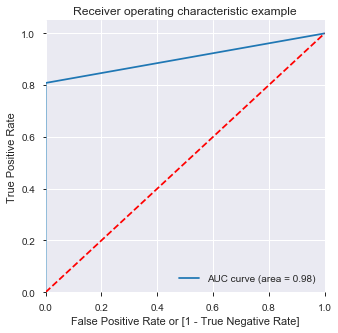

In [74]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Class"], y_train_pred_final.predicted, drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_pred_final["Class"], y_train_pred_final["probability"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='AUC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### K Nearest Neighbors

In [75]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)
y_knn_prob=knn.predict_proba(X_test)[:,1]

In [77]:
#metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_knn))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_knn))
print("Precision:\n",metrics.precision_score(y_test,y_knn))
print("Recall:\n",metrics.recall_score(y_test,y_knn))
print("AUC:\n",metrics.roc_auc_score(y_test,y_knn_prob))
auc=metrics.roc_auc_score(y_test,y_knn_prob)

Confusion Matrix:
 [[85301     0]
 [  132    10]]
Accuracy:
 0.9984551104244935
Precision:
 1.0
Recall:
 0.07042253521126761
AUC:
 0.5972707088122574


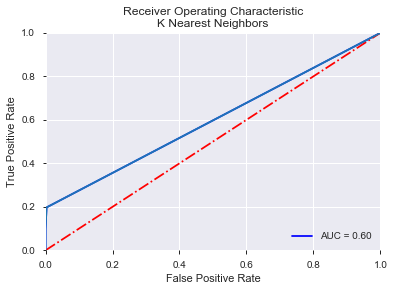

In [78]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.plot(fpr,tpr)
#plt.title('K Nearest Neighbors')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristic\nK Nearest Neighbors')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)
y_dt=dt_model.predict(X_test)
y_dt_prob=dt_model.predict_proba(X_test)[:,1]

In [82]:
#metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_dt))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_dt))
print("Precision:\n",metrics.precision_score(y_test,y_dt))
print("Recall:\n",metrics.recall_score(y_test,y_dt))
print("AUC:\n",metrics.roc_auc_score(y_test,y_dt_prob))
auc=metrics.roc_auc_score(y_test,y_dt_prob)

Confusion Matrix:
 [[83295  2006]
 [   26   116]]
Accuracy:
 0.9762180635043245
Precision:
 0.05466540999057493
Recall:
 0.8169014084507042
AUC:
 0.8778875996863468


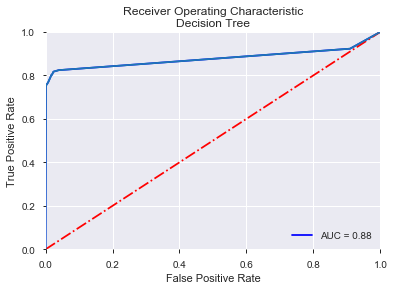

In [83]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_dt_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristic\nDecision Tree')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [86]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

Confusion Matrix:
 [[85284    17]
 [   35   107]]
Accuracy:
 0.9993914071369217
Precision:
 0.8629032258064516
Recall:
 0.7535211267605634
AUC:
 0.9277379968961611


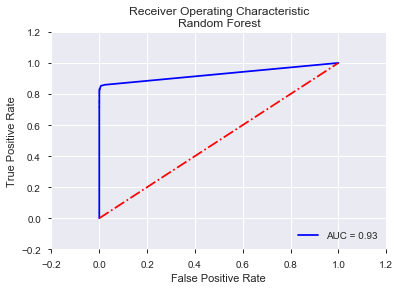

In [87]:
## using roc_cuve from the matrics
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob, drop_intermediate = False)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model building with balancing Classes

Till now we have check the model with imbalance data set,
Now we develop balance data set by SMOTE

In [88]:
# Creating seperate class variable
cls_val = data1['Class']

In [89]:
#dropping the target variable from the data set
data1.drop('Class',axis=1,inplace=True)
data1.shape

(284807, 30)

In [90]:
#converting them to numpy arrays
X=np.array(data1)
y=np.array(cls_val)
X.shape
y.shape

(284807,)

In [91]:
#splitting the data set into train and test (70:30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


In [92]:
#splitting the data set into train and test (80:20)
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [93]:
#applyting SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)

(398014, 30) (398014,)


In [94]:
print("After OverSampling, counts of label '1' in Test Data Set: {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '0' in Test Data Set: {} \n".format(sum(y_sm==0)))

After OverSampling, counts of label '1' in Test Data Set: 199007
After OverSampling, counts of label '0' in Test Data Set: 199007 



### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [96]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_test)
y_logreg_prob=logreg.predict_proba(X_test)[:,1]

In [97]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg))
print("Precision:\n",metrics.precision_score(y_test,y_logreg))
print("Recall:\n",metrics.recall_score(y_test,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob))
auc=metrics.roc_auc_score(y_test,y_logreg_prob)

Confusion Matrix:
 [[83875  1433]
 [   21   114]]
Accuracy:
 0.982982807251618
Precision:
 0.07369101486748546
Recall:
 0.8444444444444444
AUC:
 0.9578111296930165


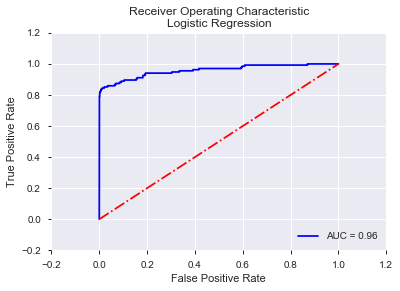

In [98]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K Nearest Neighbors

In [99]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(X_test)
y_knn_prob=knn.predict_proba(X_test)[:,1]

In [101]:
# Matrics Performance Evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_knn))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_knn))
print("Precision:\n",metrics.precision_score(y_test,y_knn))
print("Recall:\n",metrics.recall_score(y_test,y_knn))
print("AUC:\n",metrics.roc_auc_score(y_test,y_knn_prob))

Confusion Matrix:
 [[80590  4718]
 [   78    57]]
Accuracy:
 0.9438690120899313
Precision:
 0.01193717277486911
Recall:
 0.4222222222222222
AUC:
 0.7143800937431078


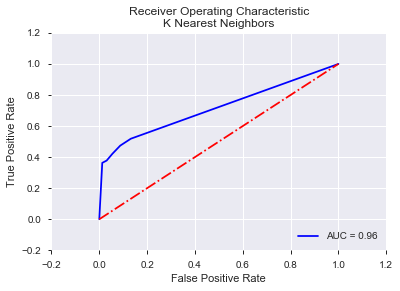

In [102]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nK Nearest Neighbors')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_sm,y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
# predictions on the training dataset
#y_train_pred= dt_model.predict(X_train)
y_dt=dt_model.predict(X_test)
y_dt_prob=dt_model.predict_proba(X_test)[:,1]

In [106]:
#Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_dt))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_dt))
print("Precision:\n",metrics.precision_score(y_test,y_dt))
print("Recall:\n",metrics.recall_score(y_test,y_dt))
print("AUC:\n",metrics.roc_auc_score(y_test,y_dt_prob))

Confusion Matrix:
 [[84145  1163]
 [   20   115]]
Accuracy:
 0.9861545123649684
Precision:
 0.08998435054773082
Recall:
 0.8518518518518519
AUC:
 0.9102880803155105


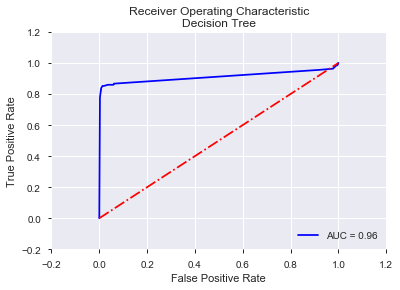

In [107]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_dt_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nDecision Tree')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Hyperparameter Tuning for DecisionTree Classifier

In [108]:
# let's tune hyper parameters for DecisionTree Classifier
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3, 15, 5),
    'min_samples_leaf': range(10, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',#criterion = "gini", 
                               random_state = 101)
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid,scoring='roc_auc', 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_sm,y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=101,
     

In [110]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.026006,3.091412,0.112514,0.015244,50,110,3,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.982570,0.983824,0.983638,0.983205,0.983783,0.983404,0.000471,8
1,25.179380,0.405345,0.102513,0.013543,100,60,3,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.987113,0.988755,0.988836,0.988170,0.988033,0.988181,0.000620,6
2,65.011925,0.485211,0.112678,0.012687,50,10,13,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.999118,0.999404,0.998995,0.998888,0.998816,0.999044,0.000207,4
3,42.120822,0.179860,0.116011,0.017145,100,60,8,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.997138,0.997524,0.996893,0.997234,0.997413,0.997240,0.000220,5
4,24.796445,0.410433,0.103652,0.018528,100,110,3,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.987113,0.988755,0.988836,0.988170,0.988033,0.988181,0.000620,6
5,59.517178,1.849481,0.108420,0.011012,50,10,8,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.999017,0.999170,0.999124,0.998932,0.999095,0.999068,0.000084,3
6,65.459065,2.957018,0.107234,0.014629,50,60,13,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.999402,0.999482,0.999373,0.999316,0.999112,0.999337,0.000125,1
7,16.695753,0.113246,0.103911,0.007405,100,60,3,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.982570,0.983824,0.983638,0.983205,0.983783,0.983404,0.000471,8
8,16.817425,0.131938,0.106230,0.011720,100,10,3,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.982570,0.983824,0.983638,0.983205,0.983783,0.983404,0.000471,8
9,60.691331,8.836754,0.083572,0.016719,50,10,13,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.999413,0.999396,0.999217,0.999329,0.999167,0.999304,0.000097,2


In [111]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9993366485904097
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=13, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=60,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=101, splitter='best')


In [112]:
# model with optimal hyperparameters
clf_gini_df = DecisionTreeClassifier(class_weight='balanced',
                                    criterion = "entropy", 
                                  random_state = 101,
                                  max_depth=13, 
                                  min_samples_leaf=10,
                                  min_samples_split=100)
clf_gini_df.fit(X_sm,y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=13, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=101, splitter='best')

In [113]:
# predictions on the training dataset
#y_train_pred= clf_gini_df.predict(X_train)
y_dt=clf_gini_df.predict(X_test)
y_dt_prob=clf_gini_df.predict_proba(X_test)[:,1]

In [114]:
#Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_dt))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_dt))
print("Precision:\n",metrics.precision_score(y_test,y_dt))
print("Recall:\n",metrics.recall_score(y_test,y_dt))
print("AUC:\n",metrics.roc_auc_score(y_test,y_dt_prob))

Confusion Matrix:
 [[84950   358]
 [   20   115]]
Accuracy:
 0.9955759980337769
Precision:
 0.24312896405919662
Recall:
 0.8518518518518519
AUC:
 0.928406349801764


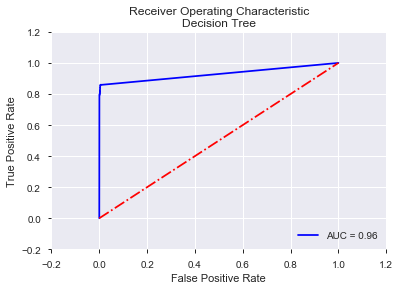

In [115]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_dt_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nDecision Tree')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Here we easily understand, AUC is good 96% but the gap between Precision 16% and Recall 78%, is much high.

### Random Forest

In [116]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [118]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

Confusion Matrix:
 [[85291    17]
 [   27   108]]
Accuracy:
 0.9994850368081645
Precision:
 0.864
Recall:
 0.8
AUC:
 0.9689061770074102


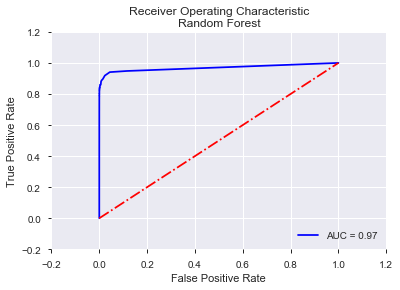

In [119]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest by using criterion='entropy'

In [120]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# By using criterion='entropy'
rf=RandomForestClassifier(criterion='entropy',random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [121]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

Confusion Matrix:
 [[85289    19]
 [   26   109]]
Accuracy:
 0.9994733330992591
Precision:
 0.8515625
Recall:
 0.8074074074074075
AUC:
 0.965297770692341


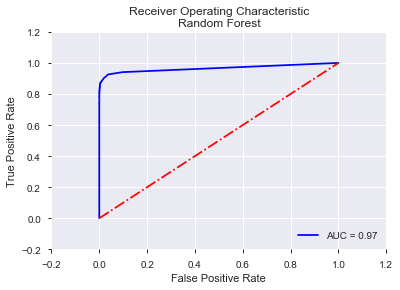

In [122]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [123]:
# import xgboost
from xgboost import XGBClassifier

In [124]:
# XGBoost CV model
xgc = XGBClassifier()
xgc.fit(X_sm,y_sm)
y_xg=xgc.predict(X_test)
y_xg_prob=xgc.predict_proba(X_test)[:,1]

In [125]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_xg))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_xg))
print("Precision:\n",metrics.precision_score(y_test,y_xg))
print("Recall:\n",metrics.recall_score(y_test,y_xg))
print("AUC:\n",metrics.roc_auc_score(y_test,y_xg_prob))
auc=metrics.roc_auc_score(y_test,y_xg_prob)

Confusion Matrix:
 [[84908   400]
 [   21   114]]
Accuracy:
 0.9950727385508468
Precision:
 0.22178988326848248
Recall:
 0.8444444444444444
AUC:
 0.9774115232126204


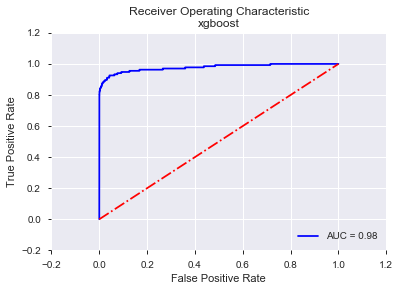

In [126]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_xg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nxgboost')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes


In [127]:
# import Gaussian Naive Bays 
from sklearn.naive_bayes import GaussianNB

In [128]:
# XGBoost  model
gnb = GaussianNB()
gnb.fit(X_sm,y_sm)
y_gnb=gnb.predict(X_test)
y_gnb_prob=gnb.predict_proba(X_test)[:,1]

In [129]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_gnb))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_gnb))
print("Precision:\n",metrics.precision_score(y_test,y_gnb))
print("Recall:\n",metrics.recall_score(y_test,y_gnb))
print("AUC:\n",metrics.roc_auc_score(y_test,y_gnb_prob))
auc=metrics.roc_auc_score(y_test,y_gnb_prob)

Confusion Matrix:
 [[84694   614]
 [   37    98]]
Accuracy:
 0.9923808855026158
Precision:
 0.13764044943820225
Recall:
 0.725925925925926
AUC:
 0.9574081888894099


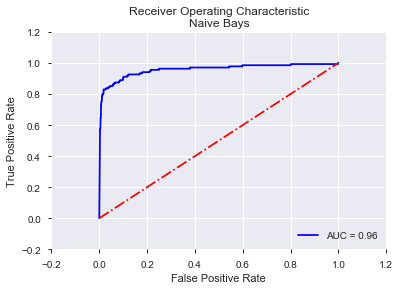

In [130]:
#plotting the AUC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_gnb_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nNaive Bays')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Recommendation for Final Model Selection on Balancing Data

### Below is the overall Summary of the various model performances on various parameters





|Model Name|Accuracy|Precision|Recall|AUC|
|----|--------|---------|------|---|
|Logistic Regression|98%|7%|84%|96%|
|K Nearest Neighbors|94%|1%|42%|71%|
|Decision Tree|99%|24%|86%|93%|
|Random Forest|99%|86%|80%|97%|
|XGBoost|99%|22%|84%|98%|
|Naive Bayes|99%|14%|73%|96%|


So here we can consider Random Forest model is best model comparatively other. As it is good recall and precision value along with AUC 